In [1]:
#%pylab inline
import pylab as pl
import numpy as np
#from sklearn import datasets, linear_model
import pandas as pd
import statsmodels.api as sm

# For creating charts: 
from matplotlib import pyplot as plt

# for having the graphs show up in the notebook, instead of as a pop up: 
% matplotlib inline

In [2]:
#import and display the data
data = pd.read_csv('guerras_secXVII/dados.csv')
data

,batalha,ano,portugueses,holandeses,ingleses,racio,espanhois,vitoria
0,Bantam,1601,6,3,0,2.000,0,0
1,Malacca Strait,1606,14,11,0,1.273,0,0
2,Ilha das Naus,1606,6,9,0,0.667,0,-1
3,Pulo Butum,1606,7,9,0,0.778,0,1
4,Surrat,1615,6,0,4,1.500,0,0
5,Ilha das Naus,1615,3,5,0,0.600,0,-1
6,Jask,1620,4,0,4,1.000,0,0
7,Hormuz,1622,6,0,5,1.200,0,-1
8,Mogincoal Shoals,1622,4,4,2,0.667,0,-1
9,Hormuz,1625,8,4,4,1.000,0,0


In [3]:
por = data['portugueses']
hol = data['holandeses']
ing = data['ingleses']
esp = data['espanhois']
vit = data['vitoria']

# reshape the data from a pandas Series to columns 
# the dependent variable
y = np.matrix(vit).transpose()
# the independent variables shaped as columns
x1 = np.matrix(por).transpose()
x2 = np.matrix(hol).transpose()
x3 = np.matrix(ing).transpose()
x4 = np.matrix(esp).transpose()

# put the two columns together to create an input matrix 
# if we had n independent variables we would have n columns here
x = np.column_stack([x1,x2,x3,x4])

# create a linear model and fit it to the data
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

print('coeficients: ',f.params[0:4])
print('Intercept: ',f.params[4])
print('P-Values: ',f.pvalues)
print('R-Squared: ',f.rsquared)

coeficients:  [-0.05752095  0.02654692 -0.01460529 -0.08293093]
Intercept:  -0.270810995312
P-Values:  [ 0.75577071  0.05114901  0.04703065  0.01525448  0.38245304]
R-Squared:  0.282072371217


Display the first lines in the table

In [4]:
data.head()

,batalha,ano,portugueses,holandeses,ingleses,racio,espanhois,vitoria
0,Bantam,1601,6,3,0,2.000,0,0
1,Malacca Strait,1606,14,11,0,1.273,0,0
2,Ilha das Naus,1606,6,9,0,0.667,0,-1
3,Pulo Butum,1606,7,9,0,0.778,0,1
4,Surrat,1615,6,0,4,1.500,0,0


In [5]:
data.shape

(28, 8)

In [6]:
#data.drop('racio', inplace=True, axis=1)
#data.drop(data.columns[-3], inplace=True, axis=1)

In [7]:
#data.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a3af1ac18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7a3562aac8>]], dtype=object)

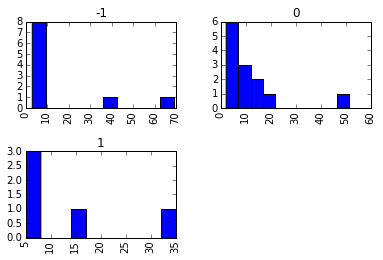

In [8]:
data.hist(column='portugueses', by='vitoria')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a3af2d278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7a353c0438>]], dtype=object)

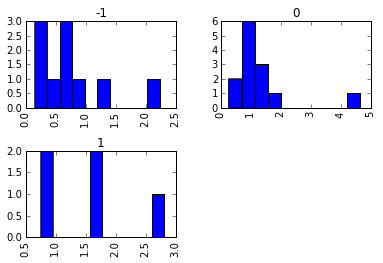

In [9]:
data.hist(column='racio', by='vitoria')